#### Neural Networks_ForestFire

In [1]:
# Create your first MLP in Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 7
np.random.seed(seed)

In [3]:
### Reading Dataset
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data.drop(['month', 'day'], axis=1, inplace=True)


In [7]:
data.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [8]:
data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [11]:
### Replacing Target Variable with 0 and 1 ('0' for small and '1' for large)
data['size_category'].replace({'small': 0, 'large': 1}, inplace=True)

In [12]:
data['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [13]:
### Splitting Data into X and Y Variables
X = data.iloc[:, :28]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
Y = data['size_category']
Y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [15]:
cols = X.columns
cols

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

In [16]:
### Normalizing Data
def normal(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
X_norm = normal(X).round(2)
X_norm

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.87,0.09,0.10,0.09,0.19,0.42,0.70,0.00,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.93,0.12,0.78,0.12,0.51,0.21,0.06,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.93,0.15,0.80,0.12,0.40,0.21,0.10,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.94,0.11,0.08,0.16,0.20,0.96,0.40,0.03,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.91,0.17,0.11,0.17,0.30,0.99,0.16,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.81,0.19,0.77,0.03,0.82,0.20,0.26,0.00,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.81,0.19,0.77,0.03,0.63,0.66,0.60,0.00,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.81,0.19,0.77,0.03,0.61,0.65,0.70,0.00,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.98,0.50,0.71,0.20,0.75,0.32,0.40,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22129487700>,
 'caps': [<matplotlib.lines.Line2D at 0x22129487dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221294873a0>],
 'medians': [<matplotlib.lines.Line2D at 0x221294974c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221294977c0>],
 'means': []}

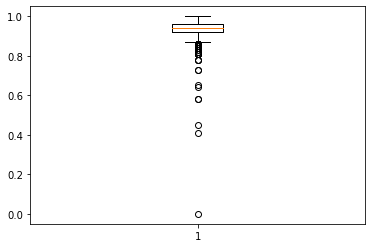

In [18]:
plt.boxplot(X_norm['FFMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22129527190>,
 'caps': [<matplotlib.lines.Line2D at 0x22129527760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2212951be50>],
 'medians': [<matplotlib.lines.Line2D at 0x22129527e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x22129531160>],
 'means': []}

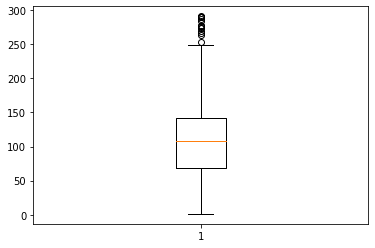

In [19]:
plt.boxplot(data['DMC'])

In [20]:
### Splitting Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.20, random_state = 3)

In [21]:
X_train.shape

(413, 28)

In [22]:
X_test.shape

(104, 28)

In [23]:
y_test

16     0
218    1
418    0
102    0
441    0
      ..
377    1
132    0
186    1
429    0
233    1
Name: size_category, Length: 104, dtype: int64

#### Model Building

In [24]:
model_1 = Sequential()
model_1.add(Dense(12, input_dim = 28, activation = 'relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [25]:
model_1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [26]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 10, verbose=0)

In [27]:
acc_train = model_1.evaluate(X_train, y_train, verbose=0)
acc_test = model_1.evaluate(X_test, y_test, verbose=0)
print('Train_Accuracy: %.3f, Test_Accuracy: %.3f' % ((acc_train[1]*100), (acc_test[1]*100)))

Train_Accuracy: 87.167, Test_Accuracy: 86.538


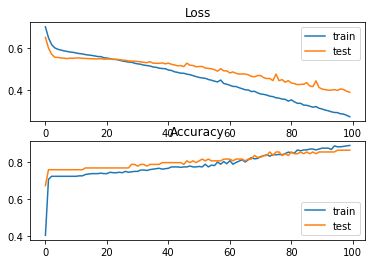

In [28]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#### Tuning Hyperparameters

In [29]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam 

#### Tuning of Hyperparameters :- Batch Size and Epochs

In [30]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])
    return model  


In [31]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [32]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20]
epochs = [150, 200]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 0)
grid_result = grid.fit(X_train,y_train)

In [33]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9563914060592651, using {'batch_size': 10, 'epochs': 200}
0.9395533442497254,0.05647417387835392 with: {'batch_size': 10, 'epochs': 150}
0.9563914060592651,0.016414676349425072 with: {'batch_size': 10, 'epochs': 200}
0.9250661134719849,0.039066600579620525 with: {'batch_size': 20, 'epochs': 150}
0.9491037368774414,0.033838619205979865 with: {'batch_size': 20, 'epochs': 200}


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [34]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.735, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.711, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.711, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.756, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.707, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.735, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.711, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.711, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.756, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.707, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.807, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.711, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.711, total=   0.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.756, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.720, total=   0.9s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.735, total=   0.9s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   44.9s finished


In [35]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7409050941467286, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7240082263946533,0.018838496118431493 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7240082263946533,0.018838496118431493 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7409050941467286,0.03713415896798915 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7240082263946533,0.018838496118431493 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7264178633689881,0.017738922083571876 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7240082263946533,0.018838496118431493 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7240082263946533,0.018838496118431493 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7240082263946533,0.018838496118431493 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7288862705230713,0.02762492565821262 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Training model with optimum values of Hyperparameters

In [38]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(10,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

final_model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 200)

# Fitting the model

history_2 = final_model.fit(X_train,y_train)


In [40]:
y_predict_train = final_model.predict(X_train)
print(accuracy_score(y_train,y_predict_train)*100)

99.75786924939467


In [41]:
y_predict_test = final_model.predict(X_test)
print(accuracy_score(y_test, y_predict_test)*100)

96.15384615384616
